In [1]:
from schwarzchild_sim import *
from schwarzchild_util import *
from time import sleep
from astropy import units as u
import numpy as np
import pylab as pl

# Schwarzchild orbits
### Sagan Sutherland

With this code I can simulate the orbit of a body around a schwarzchild black hole. It only takes one initial condition to create the entire orbit.

For example, the orbit of Earth looks like this.

100.00%
one year   = 31557600.0s
orbit time = 31506617.0s


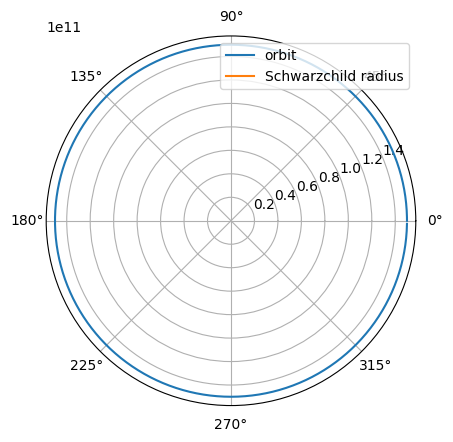

In [2]:
preset, kwargs = earth_orbit_preset
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res, preset.M)
sleep(0.1)
print(f"one year   = {365.25*24*60*60}s")
print(f"orbit time = {res.T[2][-1]}s")

### More importantly, the orbit of Mercury can be simulated

100.00%
Mercurial precession = 43.367386677172185 arcsec / century


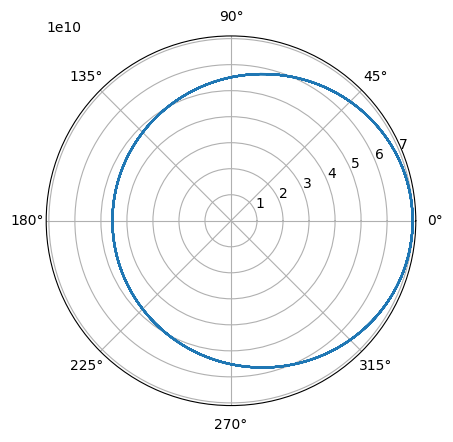

In [3]:
preset, kwargs = mercury_orbit_preset
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res)
sleep(0.1)
print(f"Mercurial precession = {calculate_precession(res).to(u.arcsecond/u.century)}")

Mercury precesses at a rate which very nearly matches the actual measured value (43 "/century)!

Let's look at a more extreme case of precession to get an idea of what's happening.

100.00%
precession = 1.4250024974227833 deg / orbit


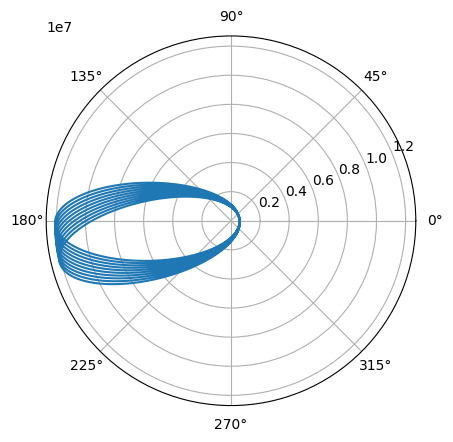

In [4]:
preset, kwargs = small_precession_preset
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res)
sleep(0.1)
print(f"precession = {calculate_precession(res, True).to(u.deg)} / orbit")

### Just how much precession can we get?

100.00%
precession = 120.07006993249772 deg / orbit


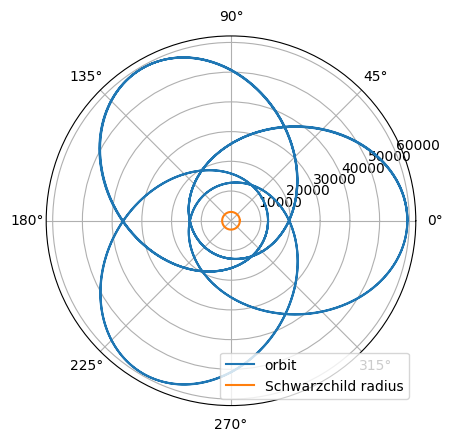

In [5]:
preset, kwargs = three_lobe_zoom_whirl_preset
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res, preset.M)
sleep(0.1)
print(f"precession = {calculate_precession(res, True).to(u.deg)} / orbit")

100.00%
precession = 180.00661299854104 deg / orbit


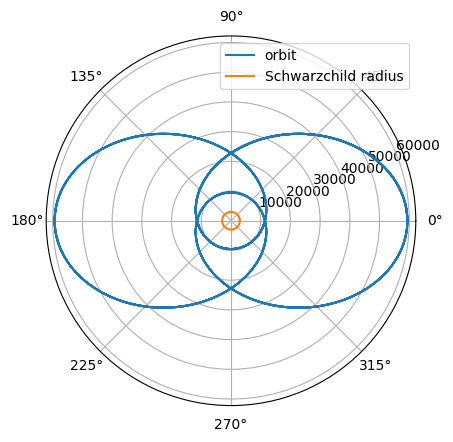

In [6]:
preset, kwargs = two_lobe_zoom_whirl_preset
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res, preset.M)
sleep(0.1)
print(f"precession = {calculate_precession(res, True).to(u.deg)} / orbit")

100.00%
precession = 360.414836168761 deg / orbit


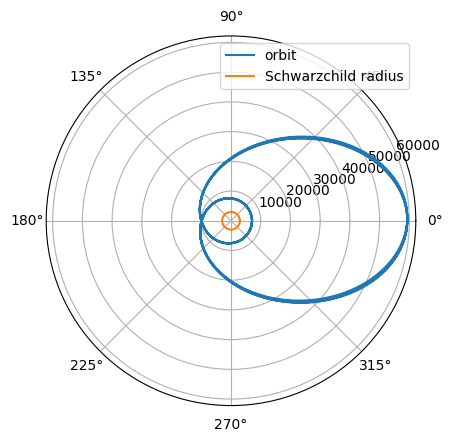

In [7]:
preset, kwargs = one_lobe_zoom_whirl_preset
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res, preset.M)
sleep(0.1)
print(f"precession = {calculate_precession(res, True).to(u.deg)} / orbit")

## What's really going on?

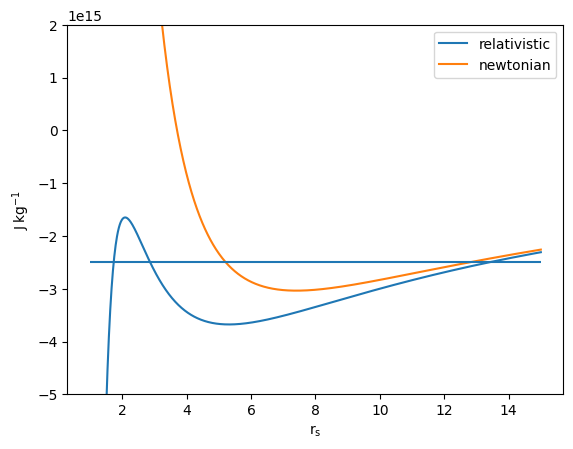

In [8]:
plot_effective_potential(one_lobe_zoom_whirl_preset[0], "rn", np.linspace(1., 15., 1000))
pl.hlines(-2.5e15, 1, 15)
pl.ylim(top=2e15, bottom=-0.5e16);

# Demo slides

100.00%
precession = 276.6763695841313 deg / orbit


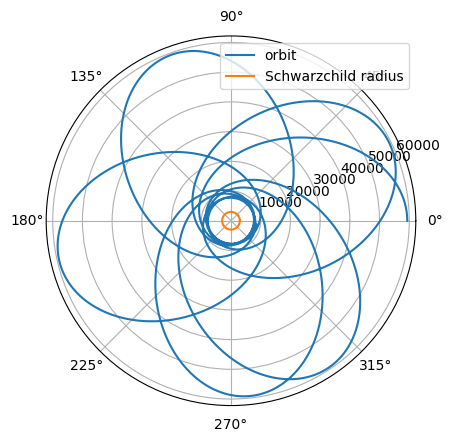

In [9]:
preset, kwargs = one_lobe_zoom_whirl_preset
preset = preset.clone()
preset.omega *= 1.01
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res, preset.M)
sleep(0.1)
print(f"precession = {calculate_precession(res, True).to(u.deg)} / orbit")

100.00%


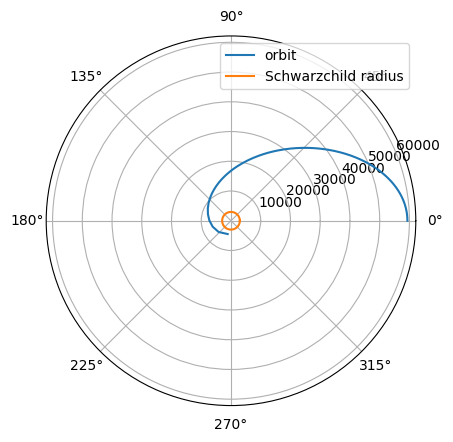

In [10]:
preset, kwargs = one_lobe_zoom_whirl_preset
preset = preset.clone()
preset.omega *= 0.9
res = simulate_conditions_rel(
    preset,
    **kwargs,
)
plot_orbit(res, preset.M)

# Code shown

```
fn update_v4(&mut self, delta_s: f64) {
    let r2 = self.r * self.r;
    let omega2 = self.omega * self.omega;

    let dr = self.v * delta_s;
    let dtheta = self.omega * delta_s;
    let dv = (-0.5 * self.M * (1. / r2 + omega2) + (self.r - self.M) * omega2) * delta_s;

    let old_h = self.get_h();
    self.r += dr + 0.5 * dv * delta_s;
    self.theta += dtheta;
    self.omega = old_h / (self.r * self.r);
    self.v += dv;
}
```